## Introduction

In this Jupyter Notebook we will consider the number of flips needed until a certain subsequence appears to demonstrate a potential issue with the efficiency of obtaining a unbiased outcome from a biased coin.

## Installation of Dependencies

First, we begin by installing the necessary dependencies for this notebook.

In [8]:
import numpy as np
import ipywidgets as widgets
import plotly.graph_objects as go

## Experiment

In the following widgets, we can choose the step size of the probability of the heads for a coin, then see a histogram with the number of flips until the outcome $(\ldots , H, T)$ is observed.

In [22]:
style = {'description_width': 'initial'}
# Create a sliding floating point widget
user_input = widgets.FloatSlider(
    value=0.05,
    min=0.0,
    max=0.5,
    step=0.01,
    description='Step Size:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
    style = style
)

# Display the widget
display(user_input)

FloatSlider(value=0.05, continuous_update=False, description='Step Size:', max=0.5, readout_format='.3f', step…

In [13]:
# Setting up a random number generator with a fixed state for reproducibility.
rng = np.random.default_rng(seed=316)

In [23]:
step_size = user_input.value

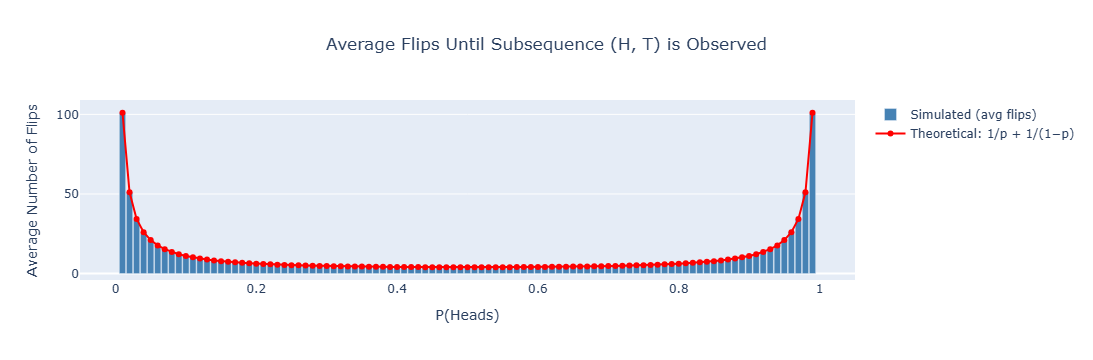

In [24]:
def flips_until_HT(p, rng):
    """Simulate flips of a coin with P(H)=p until the subsequence H,T appears.
       Returns the total number of flips."""
    flips = 0
    prev = None
    while True:
        flip = 'H' if rng.random() < p else 'T'
        flips += 1
        if prev == 'H' and flip == 'T':
            return flips
        prev = flip

num_trials = 10000
probabilities = np.arange(step_size, 1.0, step_size)

# For each probability, run num_trials simulations and record the average flips
avg_flips = []
for p in probabilities:
    trial_results = [flips_until_HT(p, rng) for _ in range(num_trials)]
    avg_flips.append(np.mean(trial_results))

# Theoretical expected number of flips until HT: E = 1/p + 1/(1-p)
theoretical = [1/p + 1/(1-p) for p in probabilities]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=probabilities,
    y=avg_flips,
    name='Simulated (avg flips)',
    marker_color='steelblue'
))
fig.add_trace(go.Scatter(
    x=probabilities,
    y=theoretical,
    name='Theoretical: 1/p + 1/(1−p)',
    mode='lines+markers',
    line=dict(color='red', width=2)
))
fig.update_layout(
    title= dict(
        text='Average Flips Until Subsequence (H, T) is Observed',
        x=0.5,
        xanchor="center",
        ),
    xaxis_title='P(Heads)',
    yaxis_title='Average Number of Flips',
    bargap=0.1
)
fig.show()